# CHATBOTS - Using Natural Language Processing and Tensorflow

In [1]:
#Used in Tensorflow Model
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tflearn
import random

#Usde to for Contextualisation and Other NLP Tasks.
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#Other
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
import nltk
from nltk.stem import SnowballStemmer
nltk.download(['stopwords'])

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\psund\anaconda3\envs\qwerty\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print("Processing the Intents.....")
with open('intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [4]:
words = []
classes = []
documents = []
ignore_words = ['?', '_', '!', '-']
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print("words",words)
print(len(classes),"classes",classes)
print("documents",documents)

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......
words ['Hi', 'Hello', 'Hey', 'Good', 'day', 'How', 'are', 'you', '?', 'how', 'was', 'your', 'day', 'Goodbye', 'Bye', 'See', 'you', 'later', 'Talk', 'to', 'you', 'later', 'Who', 'created', 'you', '?', 'Who', 'is', 'your', 'developer', '?', 'Who', 'made', 'you', '?', 'What', 'is', 'your', 'name', '?', 'What', 'should', 'I', 'call', 'you', '?', 'Who', 'are', 'you', '?', 'What', 'are', 'the', 'college', 'timings', '?', 'When', 'is', 'the', 'college', 'open', '?', 'What', 'are', 'your', 'hours', 'of', 'operation', '?', 'How', 'can', 'I', 'contact', 'the', 'college', '?', 'What', 'is', 'the', 'college', 'telephone', 'number', '?', 'Can', 'I', 'get', 'your', 'contact', 'number', '?', 'What', 'courses', 'are', 'offered', 'in', 'the', 'college', '?', 'Can', 'you', 'tell', 'me', 'about', 'the', 'available', 'courses', '?', 'What', 'are', 'the', 'branches', 'in', 'the', 'college', '?', 'How', 'much', 

In [5]:
from nltk import ngrams
from collections import Counter

In [6]:
#generating bigram
n = 2  
bigrams = ngrams(words, n)
# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)

# Print the bigram frequencies
for bigram, count in bigram_counts.items():
    print(f"{bigram}: {count} times")

('Hi', 'Hello'): 1 times
('Hello', 'Hey'): 1 times
('Hey', 'Good'): 1 times
('Good', 'day'): 1 times
('day', 'How'): 1 times
('How', 'are'): 4 times
('are', 'you'): 4 times
('you', '?'): 5 times
('?', 'how'): 1 times
('how', 'was'): 1 times
('was', 'your'): 1 times
('your', 'day'): 1 times
('day', 'Goodbye'): 1 times
('Goodbye', 'Bye'): 1 times
('Bye', 'See'): 1 times
('See', 'you'): 1 times
('you', 'later'): 2 times
('later', 'Talk'): 1 times
('Talk', 'to'): 1 times
('to', 'you'): 1 times
('later', 'Who'): 1 times
('Who', 'created'): 1 times
('created', 'you'): 1 times
('?', 'Who'): 5 times
('Who', 'is'): 1 times
('is', 'your'): 3 times
('your', 'developer'): 1 times
('developer', '?'): 1 times
('Who', 'made'): 1 times
('made', 'you'): 2 times
('?', 'What'): 65 times
('What', 'is'): 8 times
('your', 'name'): 1 times
('name', '?'): 1 times
('What', 'should'): 2 times
('should', 'I'): 2 times
('I', 'call'): 1 times
('call', 'you'): 1 times
('Who', 'are'): 2 times
('What', 'are'): 19 tim

In [7]:
n = 3

# Generate trigrams
trigrams = ngrams(words, n)

# Count the occurrences of each trigram
trigram_counts = Counter(trigrams)

# Print the trigram frequencies
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count} times")

('Hi', 'Hello', 'Hey'): 1 times
('Hello', 'Hey', 'Good'): 1 times
('Hey', 'Good', 'day'): 1 times
('Good', 'day', 'How'): 1 times
('day', 'How', 'are'): 1 times
('How', 'are', 'you'): 1 times
('are', 'you', '?'): 2 times
('you', '?', 'how'): 1 times
('?', 'how', 'was'): 1 times
('how', 'was', 'your'): 1 times
('was', 'your', 'day'): 1 times
('your', 'day', 'Goodbye'): 1 times
('day', 'Goodbye', 'Bye'): 1 times
('Goodbye', 'Bye', 'See'): 1 times
('Bye', 'See', 'you'): 1 times
('See', 'you', 'later'): 1 times
('you', 'later', 'Talk'): 1 times
('later', 'Talk', 'to'): 1 times
('Talk', 'to', 'you'): 1 times
('to', 'you', 'later'): 1 times
('you', 'later', 'Who'): 1 times
('later', 'Who', 'created'): 1 times
('Who', 'created', 'you'): 1 times
('created', 'you', '?'): 1 times
('you', '?', 'Who'): 2 times
('?', 'Who', 'is'): 1 times
('Who', 'is', 'your'): 1 times
('is', 'your', 'developer'): 1 times
('your', 'developer', '?'): 1 times
('developer', '?', 'Who'): 1 times
('?', 'Who', 'made'): 1

In [8]:
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print("words",words)


Stemming, Lowering and Removing Duplicates.......
words ['#', '&', "'re", "'s", '(', ')', ',', '.', '1', 'a', 'abl', 'about', 'abroad', 'academ', 'access', 'accommod', 'achiev', 'act', 'address', 'admin', 'admit', 'adv', 'aid', 'alumn', 'among', 'an', 'and', 'anoth', 'any', 'anyth', 'apart', 'apply', 'ar', 'are', 'area', 'around', 'art', 'as', 'aspir', 'assign', 'assist', 'assocy', 'at', 'athlet', 'attend', 'attract', 'auth', 'av', 'avail', 'award', 'background', 'bal', 'be', 'becom', 'being', 'belong', 'best', 'big', 'body', 'branch', 'break', 'build', 'busy', 'by', 'bye', 'cal', 'calend', 'camp', 'campus-wide', 'can', 'capston', 'car', 'cent', 'chat', 'cho', 'choos', 'class', 'classroom', 'cliqu', 'club', 'co-op', 'cod', 'collab', 'colleg', 'comfort', 'commun', 'commut', 'complaint', 'complex', 'comput', 'connect', 'consequ', 'conserv', 'contact', 'contribut', 'coop', 'could', 'counsel', 'country', 'cours', 'cov', 'cre', 'criter', 'cross-cultural', 'culmin', 'cult', 'cur', 'dai', 'da

In [9]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("Removing unnecessary spaces, special symbols, numbers, and stopwords")
words = [re.sub(r'[^a-zA-Z]', ' ', w).strip() for w in words if w.lower() not in stop_words]
words = sorted(list(set(filter(None, words))))
words = [word for word in words if not any(char.isdigit() for char in word)]
classes = sorted(list(set(classes)))
print(len(words), "words obtained after unnecessary things")
print("words",words)
print("classes",classes)
print("documents",documents)

Removing unnecessary spaces, special symbols, numbers, and stopwords
421 words obtained after unnecessary things
words ['abl', 'abroad', 'academ', 'access', 'accommod', 'achiev', 'act', 'address', 'admin', 'admit', 'adv', 'aid', 'alumn', 'among', 'anoth', 'anyth', 'apart', 'apply', 'ar', 'area', 'around', 'art', 'aspir', 'assign', 'assist', 'assocy', 'athlet', 'attend', 'attract', 'auth', 'av', 'avail', 'award', 'background', 'bal', 'becom', 'belong', 'best', 'big', 'body', 'branch', 'break', 'build', 'busy', 'bye', 'cal', 'calend', 'camp', 'campus wide', 'capston', 'car', 'cent', 'chat', 'cho', 'choos', 'class', 'classroom', 'cliqu', 'club', 'co op', 'cod', 'collab', 'colleg', 'comfort', 'commun', 'commut', 'complaint', 'complex', 'comput', 'connect', 'consequ', 'conserv', 'contact', 'contribut', 'coop', 'could', 'counsel', 'country', 'cours', 'cov', 'cre', 'criter', 'cross cultural', 'culmin', 'cult', 'cur', 'dai', 'dat', 'day', 'decid', 'defin', 'depart', 'describ', 'desir', 'develo

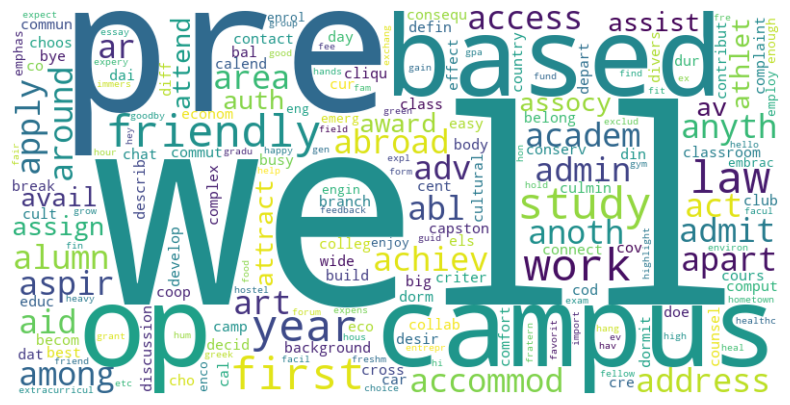

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ignore_words = ['?', '_', '!', '-']
words = [w.lower() for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

# Assuming 'documents' is a list of strings containing your text data

# Combine all words into a single string
text = " ".join(words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [11]:
'''from nltk import ngrams
from collections import Counter'''

'from nltk import ngrams\nfrom collections import Counter'

In [12]:
'''#generating bigram
n = 2  
bigrams = ngrams(words, n)
# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)

# Print the bigram frequencies
for bigram, count in bigram_counts.items():
    print(f"{bigram}: {count} times")'''


'#generating bigram\nn = 2  \nbigrams = ngrams(words, n)\n# Count the occurrences of each bigram\nbigram_counts = Counter(bigrams)\n\n# Print the bigram frequencies\nfor bigram, count in bigram_counts.items():\n    print(f"{bigram}: {count} times")'

In [13]:
print("Creating the Data for our Model.....")
training = []
output = []
print("Creating a List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Training Set, Bag of Words for our Model....")
count_ones = 0


for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    '''representing as single label classification task'''
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

    # Counting the number of 1s and 0s
    count_ones += sum(output_row)
    

print("Training set:")


print("Number of 1s:", count_ones)




Creating the Data for our Model.....
Creating a List (Empty) for Output.....
Creating Training Set, Bag of Words for our Model....
Training set:
Number of 1s: 412


In [14]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)
print("Creating Training list")
'''train_x denotes input features'''
train_x = list(training[:,0])
'''train_y denotes target variables'''
train_y = list(training[:,1])
print("Building Neural Network for Out Chatbot to be Contextual....")
print("Resetting graph data....")
tf.reset_default_graph()



Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Training list
Building Neural Network for Out Chatbot to be Contextual....
Resetting graph data....


In [15]:
#Building Neural Network for Our Chatbot to be Contextual
tf.reset_default_graph()
net_lstm = tflearn.input_data(shape=[None, len(train_x[0])])
net_lstm = tflearn.embedding(net_lstm, input_dim=len(train_x[0]), output_dim=128)
net_lstm = tflearn.lstm(net_lstm, 128, dropout=0.8)
net_lstm = tflearn.fully_connected(net_lstm, len(train_y[0]), activation='softmax')
net_lstm = tflearn.regression(net_lstm)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
#Training the LSTM Model
model_lstm = tflearn.DNN(net_lstm, tensorboard_dir='tflearn_logs_lstm')
model_filename_lstm = 'model_lstm.tflearn'

model_lstm.fit(train_x, train_y, n_epoch=700, batch_size=80, show_metric=True)

Training Step: 4199  | total loss: 1.83580 | time: 21.750s
| Adam | epoch: 700 | loss: 1.83580 - acc: 0.5800 -- iter: 400/412
Training Step: 4200  | total loss: 1.69976 | time: 23.258s
| Adam | epoch: 700 | loss: 1.69976 - acc: 0.6136 -- iter: 412/412
--


In [17]:
'''creating an input layer for neural network'''
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")
print(net)

Training....
Tensor("FullyConnected_2/Softmax:0", shape=(?, 137), dtype=float32)


In [18]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [19]:

print("Here i am using stochiastic Gradient Descent ALgorithm")
model_filename = 'model.tflearn'
print("Training the model...")

model.fit(train_x, train_y, n_epoch=1000, batch_size=10, show_metric=True)
print("Saving the trained model...")
model.save(model_filename)
print("Model saved successfully!")

Here i am using stochiastic Gradient Descent ALgorithm
Training the model...


IndexError: list index out of range

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have 'train_x' and 'train_y' defined
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Assuming you have a fresh model instance created and compiled


print("Training on the train_test_split data...")
model.fit(X_train, y_train, n_epoch=1000, batch_size=10, show_metric=True, validation_set=(X_test, y_test))

print("Saving the trained model...")
model.save(model_filename)
print("Model saved successfully!")

Training Step: 74999  | total loss: 0.39247 | time: 0.120s
| Adam | epoch: 2000 | loss: 0.39247 - acc: 0.9685 -- iter: 320/329
Training Step: 75000  | total loss: 0.35340 | time: 1.127s
| Adam | epoch: 2000 | loss: 0.35340 - acc: 0.9716 | val_loss: 1.67254 - val_acc: 0.7831 -- iter: 329/329
--
Saving the trained model...
INFO:tensorflow:c:\Users\psund\Documents\chatbot intents - Copy\chatbot intents - Copy\model.tflearn is not in all_model_checkpoint_paths. Manually adding it.
Model saved successfully!


In [ ]:
print("Pickle is also Saved..........")
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Pickle is also Saved..........


In [ ]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']
with open('intents.json') as json_data:
    intents = json.load(json_data)
print(words)
print(classes)

    
#print("Loading the Model......")
#model.load("./model.tflearn")

Loading Pickle.....
['abl', 'abroad', 'academ', 'access', 'accommod', 'achiev', 'act', 'address', 'admin', 'admit', 'adv', 'aid', 'alumn', 'among', 'anoth', 'anyth', 'apart', 'apply', 'ar', 'area', 'around', 'art', 'aspir', 'assign', 'assist', 'assocy', 'athlet', 'attend', 'attract', 'auth', 'av', 'avail', 'award', 'background', 'bal', 'becom', 'belong', 'best', 'big', 'body', 'branch', 'break', 'build', 'busy', 'bye', 'cal', 'calend', 'camp', 'campus wide', 'capston', 'car', 'cent', 'chat', 'cho', 'choos', 'class', 'classroom', 'cliqu', 'club', 'co op', 'cod', 'collab', 'colleg', 'comfort', 'commun', 'commut', 'complaint', 'complex', 'comput', 'connect', 'consequ', 'conserv', 'contact', 'contribut', 'coop', 'could', 'counsel', 'country', 'cours', 'cov', 'cre', 'criter', 'cross cultural', 'culmin', 'cult', 'cur', 'dai', 'dat', 'day', 'decid', 'defin', 'depart', 'describ', 'desir', 'develop', 'diff', 'din', 'discussion based', 'divers', 'doe', 'dorm', 'dormit', 'dur', 'easy', 'eco frien

# sample GUI for the chatbot

In [ ]:
import tkinter
from tkinter import *
import numpy as np
import nltk
import random
import tflearn
import tensorflow as tf
import pickle
import json
from nltk.stem.lancaster import LancasterStemmer



ERROR_THRESHOLD = 0.8
print("ERROR_THRESHOLD = 0.8")

def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print("found in bag: %s" % w)
    return np.array(bag)

def classify(sentence):
    results = model.predict([bow(sentence, words)])[0]
    results = [[i, r] for i, r in enumerate(results) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = [(classes[r[0]], r[1]) for r in results]
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    if results:
        while results:
            for i in intents['intents']:
                if i['tag'] == results[0][0]:
                    return random.choice(i['responses'])
            results.pop(0)

def send(event=None):
    msg = EntryBox.get("1.0", 'end-1c').strip()
    EntryBox.delete("0.0", END)
    
    if msg == 'quit':
        base.destroy()
    elif msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#333333", font=("Arial", 14))
    
        res = response(msg)
        if res is not None:
            ChatLog.insert(END, "Bot: " + res + '\n\n')
            
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)

# Creating GUI with tkinter
base = Tk()
base.title("Chatbot")
base.geometry("1300x575")
base.configure(bg="#444444")
base.resizable(width=False, height=False)

# Create Chat window
ChatLog = Text(base, bd=0, bg="#ffffff", height="10", width="60", font=("Arial", 14))
ChatLog.config(state=DISABLED)

# Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="hand2")
ChatLog['yscrollcommand'] = scrollbar.set

# Create Button to send message
SendButton = Button(base, font=("Arial",16), text="Send", width="10", height=3,
                    bd=0, bg="#0080ff", activebackground="#0059b3", fg='#ffffff',
                    command=send)

# Create the box to enter message
EntryBox = Text(base, bd=0, bg="#ffffff", width="40", height="4", font=("Arial", 14))
EntryBox.bind("<Return>", send)  # bind the "Enter" key to the send function

# Place all components on the screen
ChatLog.place(x=20, y=20, height=420, width=1250)
scrollbar.place(x=1250, y=20, height=420)
EntryBox.place(x=20, y=460, height=100, width=1100)
SendButton.place(x=1149, y=457, height=100)

base.mainloop()


ERROR_THRESHOLD = 0.8


In [ ]:
import speech_recognition as sr
import pyttsx3

def speak(text):
    # Initialize the text-to-speech engine
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

# Initialize the recognizer
recognizer = sr.Recognizer()

# Use the microphone as the audio source
with sr.Microphone() as source:
    print("Say something:")
    # Adjust for ambient noise
    recognizer.adjust_for_ambient_noise(source)
    
    # Listen to the audio input
    audio = recognizer.listen(source)

    print("Recognizing...")

    try:
        # Use the Google Web Speech API to convert speech to text
        text = recognizer.recognize_google(audio)
        print(f"Text: {text}")
        speak(text)

    except sr.UnknownValueError:
        print("Google Web Speech API could not understand the audio.")

    except sr.RequestError as e:
        print(f"Could not request results from Google Web Speech API; {e}")


Say something:
